In [1]:
import sys
print(sys.version)

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
"""
Created on January 30 2019
@author: Neven Caplar
@contact: ncaplar@princeton.edu
@web: www.ncaplar.com
"""

'\nCreated on January 30 2019\n@author: Neven Caplar\n@contact: ncaplar@princeton.edu\n@web: www.ncaplar.com\n'

In [3]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}

<IPython.core.display.Javascript object>

In [4]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import numpy as np
np.set_printoptions(suppress=True)
np.seterr(divide='ignore', invalid='ignore')

# astropy
from astropy.io import *
from astropy.io import fits

import pickle

#matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 18})
%config InlineBackend.rc = {}
%matplotlib inline

# Original detector map and observed data

In [119]:
detectorMapOriginal=fits.open('/Users/nevencaplar/Documents/PFS/DetectorMap/detectorMap-sim-1-r.fits')
detectorMap5833=fits.open('/Users/nevencaplar/Documents/PFS/DetectorMap/pfsDetectorMap-005833-r1.fits')


hdu = detectorMapOriginal["FIBERID"]
fiberIds = hdu.data
fiberIds = fiberIds.astype(np.int32) 
fiberIds.shape

list_of_illuminated_slit_fibers_in_January_24_data=[32,63,111,192,223,255,289,308,342,401,418,464,518,525,587,620]

In [120]:
list_of_illuminated_science_fibers_in_January_24_data=[]
for i in list_of_illuminated_slit_fibers_in_January_24_data:
    list_of_illuminated_science_fibers_in_January_24_data.append(np.where(fiberIds==i)[0][0])
    
list_of_illuminated_science_fibers_in_January_24_data

[30, 59, 104, 180, 211, 241, 273, 292, 305, 362, 379, 423, 472, 479, 538, 569]

In [121]:
with open('/Users/nevencaplar/Documents/PFS/Data_Nov_14/Dataframes/finalHgAr_expanded.pkl', 'rb') as f:
    finalHgAr=pickle.load(f)
    
# I know this was the brightest spot in the old data
finalHgAr[finalHgAr["old_index"]==25]

,fiber,xc,yc,wavelength,close,lamp,xc_effective,old_index,old_index_aprox
69,5,2088,3322,912.5693,1,HgAr,2157,25.0,25


In [158]:
detectorMap5833[3].data[599][1]

array([4050.33862305, 4048.22290039, 4046.40307617, 4044.84155273,
       4043.5144043 , 4042.40039062, 4041.47949219, 4040.74975586,
       4040.19384766, 4039.80224609, 4039.56884766, 4039.48803711,
       4039.55883789, 4039.7800293 , 4040.15478516, 4040.68725586,
       4041.38500977, 4042.25683594, 4043.32128906, 4044.57861328,
       4046.05004883, 4047.75366211, 4049.7109375 , 4051.96118164,
       4054.5637207 ])

Text(0.5,1,'Original DetectorMap')

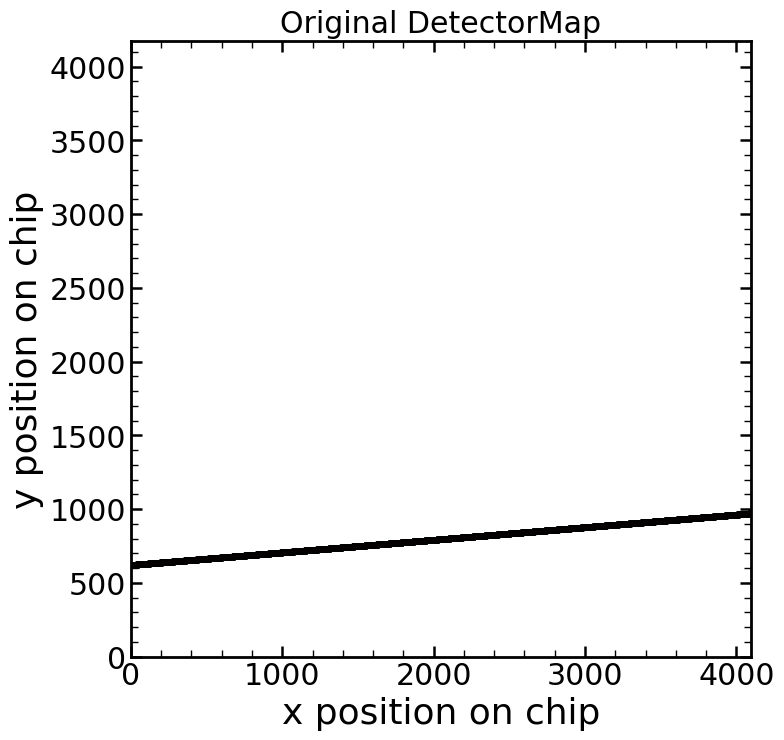

In [107]:
plt.figure(figsize=(8,8))
plt.scatter(detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list[0][:,1], detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list[0][:,2], s=15, c='red', cmap='seismic', alpha=1,edgecolor='black')
plt.ylim(0,4176)
plt.xlim(0,4096)
plt.xlabel('x position on chip')
plt.ylabel('y position on chip')
plt.title('Original DetectorMap' )

In [108]:
detectorMapOriginal[3].data

FITS_rec([(569,    0., 4026.5132 ), (569,    1., 4026.4963 ),
          (569,    2., 4026.4795 ), ..., (569, 4173.,   66.72796),
          (569, 4174.,   66.7088 ), (569, 4175.,   66.68962)],
         dtype=(numpy.record, [('index', '>i8'), ('knot', '>f4'), ('value', '>f4')]))

In [123]:
detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_x=[]
detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_y=[]
for j in list_of_illuminated_science_fibers_in_January_24_data:
    print(j)
    detectorMapOriginal_single_fiber_x=detectorMapOriginal[3].data[detectorMapOriginal[3].data['index']==j]    
    detectorMapOriginal_single_fiber_y=detectorMapOriginal[4].data[detectorMapOriginal[4].data['index']==j]
    
    detectorMapOriginal_single_fiber_as_list_x=[]
    detectorMapOriginal_single_fiber_as_list_y=[]
    # because I do not know how to work with numpy.record
    for i in range(len(detectorMapOriginal_single_fiber_y)):
        detectorMapOriginal_single_fiber_as_list_x.append(list(detectorMapOriginal_single_fiber_x[i]))
        detectorMapOriginal_single_fiber_as_list_y.append(list(detectorMapOriginal_single_fiber_y[i]))
        
    detectorMapOriginal_single_fiber_as_array_x=np.array(detectorMapOriginal_single_fiber_as_list_x)
    detectorMapOriginal_single_fiber_as_array_y=np.array(detectorMapOriginal_single_fiber_as_list_y)
    detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_x.append(detectorMapOriginal_single_fiber_as_array_x)
    detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_y.append(detectorMapOriginal_single_fiber_as_array_y)

30
59
104
180
211
241
273
292
305
362
379
423
472
479
538
569


In [139]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

x_y_values_for_912=[]
for i in range(16):
    value_nearest=find_nearest(detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_y[i][:,2],912.58)
    y_value_for_912_single_fiber=detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_y[i][detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_y[i][:,2]==value_nearest]
    
    value_nearest=find_nearest(detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_x[i][:,1],y_value_for_912_single_fiber[0][1])
    x_value_for_912_single_fiber=detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_x[i][detectorMapOriginal_for_illuminated_fiber_Jan_24_2019_as_list_x[i][:,1]==value_nearest]
    
    
    x_y_values_for_912.append([x_value_for_912_single_fiber,y_value_for_912_single_fiber])

In [140]:
x_y_values_for_912

[[array([[  30.        , 3417.        , 3831.47949219]]),
  array([[  30.        , 3417.        ,  912.56726074]])],
 [array([[  59.       , 3407.       , 3638.4453125]]),
  array([[  59.       , 3407.       ,  912.5534668]])],
 [array([[ 104.        , 3395.        , 3340.55541992]]),
  array([[ 104.        , 3395.        ,  912.61993408]])],
 [array([[ 180.        , 3379.        , 2839.68237305]]),
  array([[ 180.        , 3379.        ,  912.58154297]])],
 [array([[ 211.        , 3375.        , 2648.36352539]]),
  array([[ 211.        , 3375.        ,  912.58056641]])],
 [array([[ 241.        , 3372.        , 2450.99926758]]),
  array([[ 241.        , 3372.        ,  912.57196045]])],
 [array([[ 273.        , 3370.        , 2241.38793945]]),
  array([[ 273.        , 3370.        ,  912.57305908]])],
 [array([[ 292.        , 3370.        , 2124.27539062]]),
  array([[ 292.        , 3370.        ,  912.62139893]])],
 [array([[ 305.        , 3370.        , 1984.04968262]]),
  array([[ 3

Text(0.5,1,'Original DetectorMap')

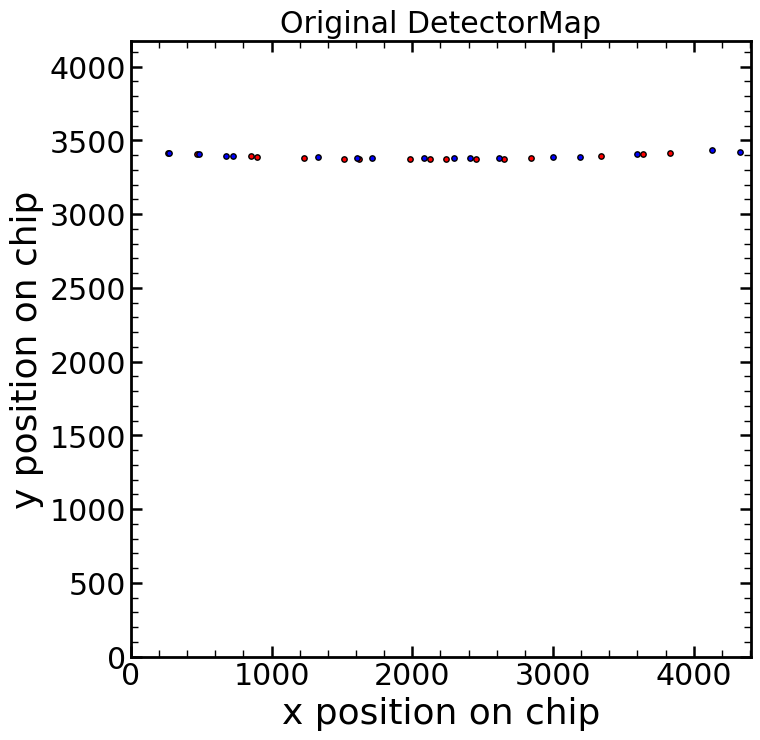

In [156]:
x_y_values_for_912_concise=[]
for i in range(16):
    x_y_values_for_912_concise.append([x_y_values_for_912[i][0][0][2],x_y_values_for_912[i][1][0][1]])
    
x_y_values_for_912_concise=np.array(x_y_values_for_912_concise)


list_of_x_coordinates=[272,486,679,726,1329,1606,1712,2086,2296,2412,2618,2998,3192,3595,4132,4325]
list_of_y_coordinates=[3414,3408,3391,3391,3384,3381,3378,3378,3378,3378,3380,3387,3387,3407,3433,3420]

plt.figure(figsize=(8,8))
plt.scatter(x_y_values_for_912_concise[:,0], x_y_values_for_912_concise[:,1], s=15, c='red', cmap='seismic', alpha=1,edgecolor='black')
plt.scatter(list_of_x_coordinates, list_of_y_coordinates, s=15, c='blue', cmap='seismic', alpha=1,edgecolor='black')
plt.ylim(0,4176)
plt.xlim(0,4406)
plt.xlabel('x position on chip')
plt.ylabel('y position on chip')
plt.title('Original DetectorMap' )

Text(0.5,1,'for Ar line at 912.58 nm')

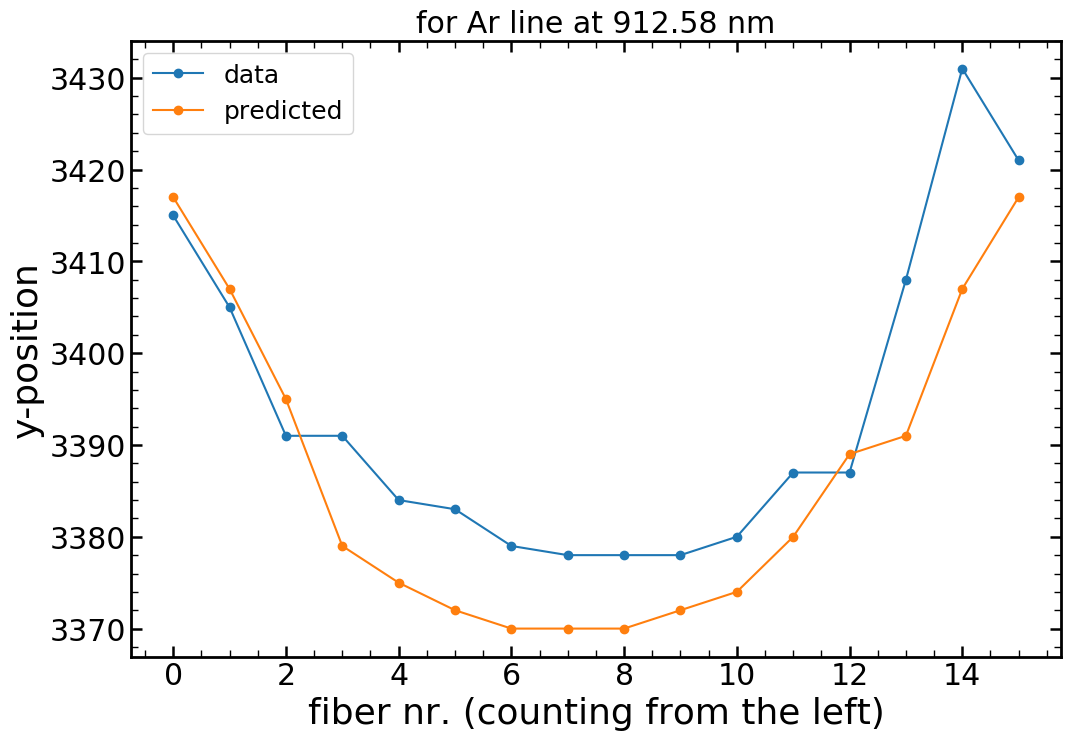

In [170]:
plt.figure(figsize=(12,8))
plt.plot([3415,3405,3391,3391,3384,3383,3379,3378,3378,3378,3380,3387,3387,3408,3431,3421],label='data',marker='o')
plt.plot(x_y_values_for_912_concise[:,1],label='predicted',marker='o')
plt.xlabel('fiber nr. (counting from the left)')
plt.ylabel('y-position')
plt.legend()
plt.title('for Ar line at 912.58 nm')

In [161]:
x_y_values_for_912_concise[:1]

array([[3831.47949219, 3417.        ]])

In [163]:
x_y_values_for_912_concise[:,1]

array([3417., 3407., 3395., 3379., 3375., 3372., 3370., 3370., 3370.,
       3372., 3374., 3380., 3389., 3391., 3407., 3417.])

In [ ]:
''